datetime : 날짜와 시간 기본 객체를 제공하는 내장 모듈

dateutil : 날짜와 시간 기본 객체를 제공하는 3자 모듈

In [1]:
from datetime import datetime
datetime(year=2019, month=4, day=10)

datetime.datetime(2019, 4, 10, 0, 0)

In [2]:
from dateutil import parser
# 데이터를 조립해 원하는 데이터를 빼내는 작업 (date 형식에 맞게)
date = parser.parse("10th of April, 2019")
date

datetime.datetime(2019, 4, 10, 0, 0)

날짜를 64비트 정수로 인코딩해 날짜 배열을 매우 간결하게 표현함

In [3]:
import numpy as np
date = np.array('2019-04-10', dtype=np.datetime64)
date

array('2019-04-10', dtype='datetime64[D]')

In [4]:
date + np.arange(12)

array(['2019-04-10', '2019-04-11', '2019-04-12', '2019-04-13',
       '2019-04-14', '2019-04-15', '2019-04-16', '2019-04-17',
       '2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21'],
      dtype='datetime64[D]')

datatime64 객체는 64비트로 인코딩됨

Numpy는 입력값으로부터 원하는 단위를 추론함

현실 세계의 데이터 타입인 경우 유용한 기본값은 datetime64[ns]임

In [5]:
np.datetime64('2019-04-10') # 하루 단위의 datetime
np.datetime64('2019-04-10 12:00') # 분 단위의 datetime
np.datetime64('2019-04-10 12:59:59.50', 'ns')

numpy.datetime64('2019-04-10T12:59:59.500000000')

## Timestamp
Python의 datetime과 dateutil의 사용 편의성과 Numpy datetime64의 효율적인 저장소와 벡터화된 인터페이스를 결합

이 객체로부터 Series나 DataFrame 데이터에 인덱스를 지정할 수 있는 DatetimeIndex를 구성함

In [6]:
import pandas as pd
date = pd.to_datetime("10th of April, 2019")
date

Timestamp('2019-04-10 00:00:00')

In [7]:
# 타임델타 : 정확한 시간길이
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2019-04-10', '2019-04-11', '2019-04-12', '2019-04-13',
               '2019-04-14', '2019-04-15', '2019-04-16', '2019-04-17',
               '2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21'],
              dtype='datetime64[ns]', freq=None)

시간 인덱스를 가진 데이터의 Series 객체 구성

In [8]:
index = pd.DatetimeIndex(['2017-03-05', '2018-03-12',
                         '2019-03-19', '2019-04-02'])
date = pd.Series([0,1,2,3], index=index)
date

2017-03-05    0
2018-03-12    1
2019-03-19    2
2019-04-02    3
dtype: int64

Series 인덱싱 연산

In [9]:
date['2018':'2019']

2018-03-12    1
2019-03-19    2
2019-04-02    3
dtype: int64

pandas.to_datetime() 함수를 사용하는 것이 일반적임
단일 날짜를 전달하면 Timestamp 객체를 생성
일련의 날짜를 전달하면 DatetimeIndex 객체를 생성

In [10]:
date = pd.to_datetime('10th of April, 2019')
date

Timestamp('2019-04-10 00:00:00')

In [11]:
dates = pd.to_datetime([datetime(2019, 4, 1), '2th of April, 2019', 
                        '2019-Apr-3', '04-04-2019', '20190405'])
dates

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05'],
              dtype='datetime64[ns]', freq=None)

DatetimeIndex 객체는 to_period() 함수에 주기(frequency) 코드를 추가해 PeriodIndex 객체로 전환될 수 있음

In [12]:
dates.to_period('D')

PeriodIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
             '2019-04-05'],
            dtype='period[D]', freq='D')

어떤 날짜에서 다른 날짜를 빼면 TimedeltaIndex 객체가 됨

In [13]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

pd.date_range() : 타임스탬프의 시퀀스 생성함

In [14]:
pd.date_range('2019-04-02', '2019-04-10')

DatetimeIndex(['2019-04-02', '2019-04-03', '2019-04-04', '2019-04-05',
               '2019-04-06', '2019-04-07', '2019-04-08', '2019-04-09',
               '2019-04-10'],
              dtype='datetime64[ns]', freq='D')

In [15]:
pd.date_range('2019-07-02', periods=8)

DatetimeIndex(['2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05',
               '2019-07-06', '2019-07-07', '2019-07-08', '2019-07-09'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.date_range('2019-04-03', periods=8, freq='H')

DatetimeIndex(['2019-04-03 00:00:00', '2019-04-03 01:00:00',
               '2019-04-03 02:00:00', '2019-04-03 03:00:00',
               '2019-04-03 04:00:00', '2019-04-03 05:00:00',
               '2019-04-03 06:00:00', '2019-04-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

pd.period_range() : 기간 시퀀스를 생성함

In [17]:
pd.period_range('2019-04', periods=8, freq='M')

PeriodIndex(['2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
             '2019-10', '2019-11'],
            dtype='period[M]', freq='M')

pd.timedelta_range() : 시간 델타 시퀀스를 생성함

In [18]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

2시간 30분 간격의 주기 지정

In [19]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

영업일 오프셋 생성

In [20]:
from pandas.tseries.offsets import BDay
pd.date_range("2019-04-01", periods=5, freq=BDay())

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05'],
              dtype='datetime64[ns]', freq='B')

Apple 주가(AAPL) 데이터

In [21]:
from pandas_datareader import data
import datetime

start_date = '2004'
end_date = '2018'
df = data.DataReader('AAPL', data_source='yahoo', start=start_date, end=end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,1.537857,1.512857,1.525000,1.526429,43612800.0,1.013922
2004-01-02,1.553571,1.512857,1.539286,1.520000,36160600.0,1.009652
2004-01-05,1.599286,1.530000,1.530000,1.583571,98754600.0,1.051879
2004-01-06,1.601429,1.550714,1.589286,1.577857,127337000.0,1.048084
2004-01-07,1.630714,1.566429,1.578571,1.613571,146718600.0,1.071807


시간에 따른 AAPL 종가

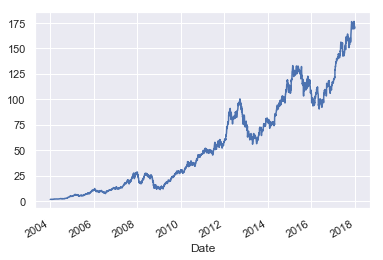

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
aapl = df['Close']
aapl.plot();

리샘플링 연산 및 주기 변경

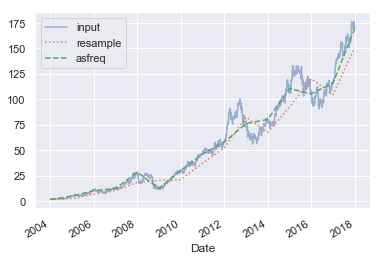

In [23]:
aapl.plot(alpha=0.5, style='-')
# 리샘플링
aapl.resample('BA').mean().plot(style=':')
# 주기 변경
aapl.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

영업일 데이터를 일별 주기로 리샘플링(up sampling) 예

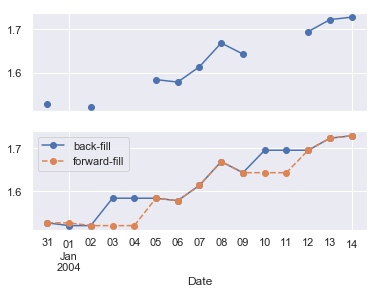

In [24]:
fig, ax = plt.subplots(2, sharex=True)
data = aapl.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
# bfill, ffill NaN, 비어있는 값을 채워줌
# 리샘플링
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill']);

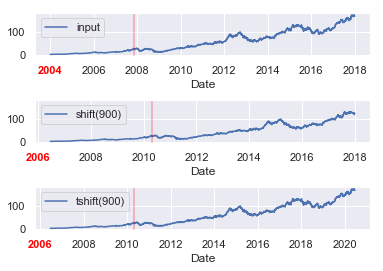

In [25]:
import pandas as pd
fig, ax = plt.subplots(3, 1, sharey=True)
fig.subplots_adjust(hspace=1)

# 데이터에 주기를 적용
data = aapl.asfreq('D', method='pad')
data.plot(ax=ax[0])
# 시프팅
data.shift(900).plot(ax=ax[1])
data.tshift(900).plot(ax=ax[2])

# 범례와 주석
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[1].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[1].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

시간 이동 연산
Apple 주가의 연간 투자 대비 효과(Return on Investment) 계산

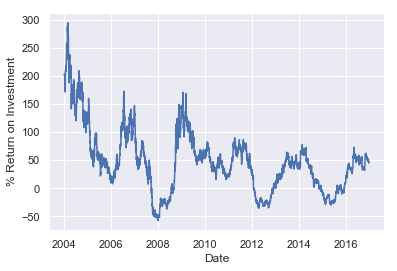

In [26]:
ROI = 100*(data.tshift(-365) / data - 1)
ROI.plot()
plt.ylabel('% Return on Investment'); 

## 롤링 윈도우(rolling windows) 연산
rolling() : Series, DataFrame 객체의 이동 평균 연산을 수행
Apple 주가의 1년 중심 롤링 평균과 표준 편차

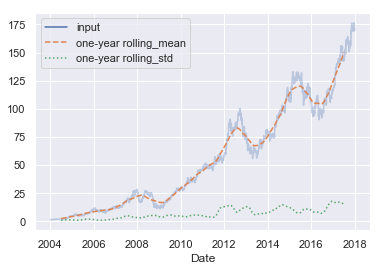

In [27]:
rolling = data.rolling(window=365, center=True)
data_F = pd.DataFrame({'input': data,
                       'one-year rolling_mean': rolling.mean(), # 평균
                       'one-year rolling_std': rolling.std()})  # 분산
ax = data_F.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## 시애틀의 프리몬트 다리를 통해하는 자전거 수

In [28]:
data = pd.read_csv('Fremont_Bridge.xls', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [29]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
# 누락 데이터가 있는 행 삭제
data.dropna().describe()

,West,East,Total
count,57615.000000,57615.000000,57615.000000
mean,51.916914,58.359889,110.276803
std,67.368033,84.958511,139.743003
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


## 데이터 시각화
시애틀 프로몬트 다리를 통과하는 시간별 자전거수

57624

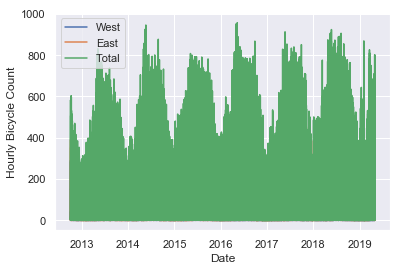

In [30]:
%matplotlib inline
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count')
len(data)

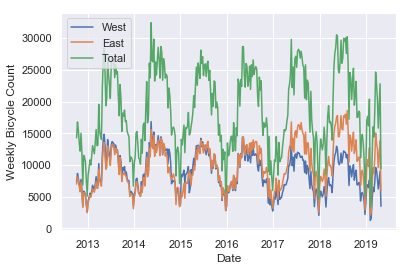

In [31]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly Bicycle Count');

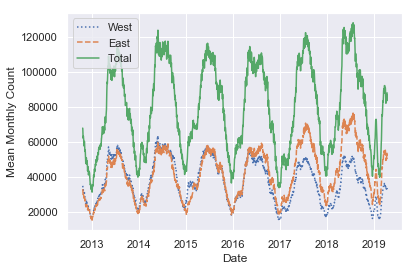

In [32]:
daily = data.resample('D').sum()
# 30일 단위로 합계를 매겨 시각화함
daily.rolling(window=30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Mean Monthly Count');

가우스 평활을 적용한 월별 자전거 수

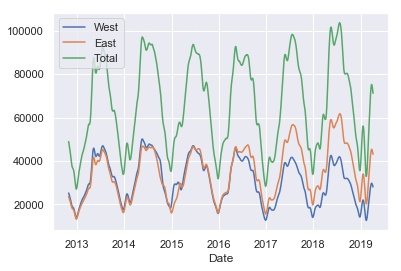

In [33]:
daily.rolling(window=50, center=True, win_type='gaussian').sum(std=10).plot()

하루의 시간대별 평균 통행량

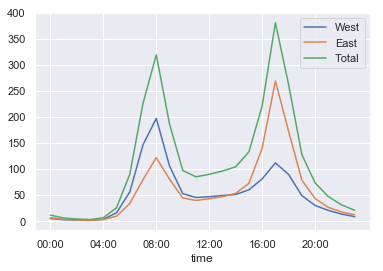

In [34]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks)

일일 평균 통행량

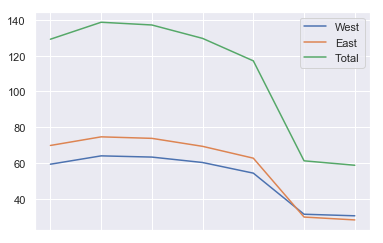

In [35]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

주중과 주말의 시간대별 통행량

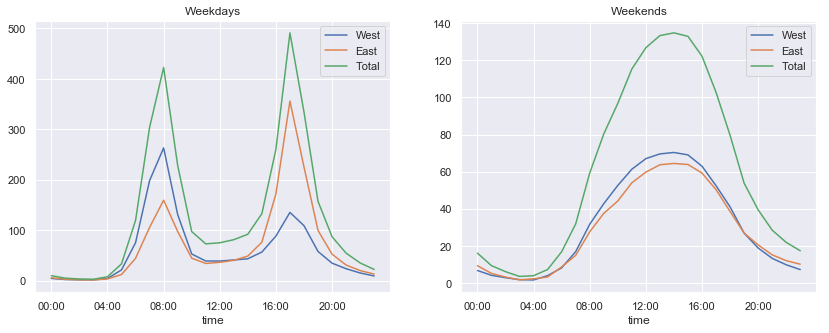

In [36]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks)
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks)

In [37]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  319k    0  319k    0     0   105k      0 --:--:--  0:00:03 --:--:--  105k
100 1637k    0 1637k    0     0   447k      0 --:--:--  0:00:03 --:--:--  447k


In [38]:
!curl -o BicycleWeather.csv https://share.cocalc.com/share/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/data/BicycleWeather.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  229k    0  229k    0     0   172k      0 --:--:--  0:00:01 --:--:--  172k


In [39]:
import pandas as pd
counts = pd.read_csv("FremontBridge.csv", index_col="Date", parse_dates=True)
weather = pd.read_csv("BicycleWeather.csv", index_col="DATE", parse_dates=True)

In [40]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


일별 총 자전거 통행량 계산

In [41]:
daily = counts.resample('D').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]
daily.head(10)

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0
2012-10-08,3537.0
2012-10-09,3501.0
2012-10-10,3235.0
2012-10-11,3047.0


데이터프레임에 요일 추가

In [42]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [43]:
daily.head(10)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


휴일 추가

In [44]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [45]:
daily.head(10)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 일조시간 데이터 추가

(8, 17)

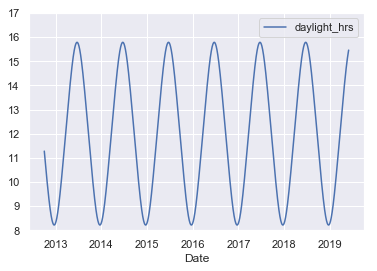

In [46]:
from matplotlib import pyplot as plt
import numpy as np

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """ 해당 날짜의 일조시간 계산 """
    days = (date - pd.datetime(2000,12,21)).days
    m = (1. - np.tan(np.radians(latitude)) *
         np.tan(np.radians(axis)*np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();
plt.ylim(8, 17)

평균 기온과 전체 강수량 데이터 추가

In [47]:
# 기온은 섭씨 1/10도 단위; 섭씨 1도 단위로 변환
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# 강수량은 1/10mm 단위; 인치 단위로 변환
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [48]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0


연도별 일별 통행량 데이터 추가

In [49]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [50]:
daily.head(10)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00000,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00000,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00000,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00000,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00000,15.85,1.0,0.010959
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.987503,0.00000,14.45,1.0,0.013699
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.929950,0.00000,12.50,1.0,0.016438
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.872560,0.00000,10.25,1.0,0.019178
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.815345,0.00000,10.55,1.0,0.021918


## 선형회귀를 이용한 자전거 통행량에 대한 모델 예측지

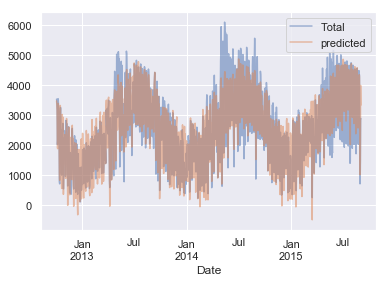

In [51]:
from sklearn.linear_model import LinearRegression

# 널 값을 갖는 행은 모두 제거
daily.dropna(axis=0, how='any', inplace=True)
columns_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "holiday", 
                 "daylight_hrs", "PRCP", "dry day", "Temp (C)", "annual"]
X = daily[columns_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X,y)
daily['predicted'] = model.predict(X)
daily[['Total', 'predicted']].plot(alpha=0.5);

각 특징이 요일별 자전거 통행량에 얼마나 기여하는지 추정하는 선형 모델 계수

In [52]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

부트스트랩 표본 재추출을 사용한 불확실성 계산

In [53]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

##### print(pd.DataFrame({'effect': params.round(0), 'error':err.round(0)}))